In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error as mse


In [14]:
data = pd.read_csv("Transformed_Housing_Data2.csv")

In [15]:
sale_price = data["Sale_Price"].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({ 'sale_price': sale_price,
                              'flat_area': flat_area})
sample_data.head()

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0


Converged after 300 iterations


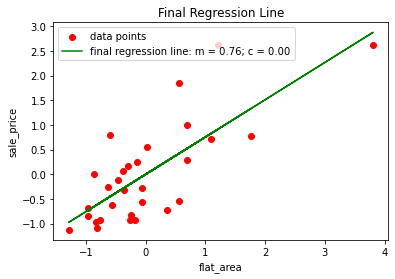

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

# Function to initialize parameters
def param_init(Y):
    return 0.1, np.mean(Y)

# Function to generate predictions
def generate_predictions(m, c, X):
    return m * X + c

# Function to compute mean squared error
def compute_cost(prediction, Y):
    return np.mean((prediction - Y) ** 2)

# Function to calculate gradients
def gradients(prediction, Y, X):
    n = len(Y)
    Gm = 2/n * np.sum((prediction - Y) * X)
    Gc = 2/n * np.sum((prediction - Y))
    return Gm, Gc

# Function to update parameters
def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha * Gc_old
    return m_new, c_new

# Function to print and plot the final result
def result(m, c, X, Y, cost, predictions):
    plt.scatter(X, Y, color='red', label='data points')
    plt.plot(X, predictions, color='green', label=f'final regression line: m = {m:.2f}; c = {c:.2f}')
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('Final Regression Line')
    plt.legend()
    plt.show()

# Initialize parameters
m, c = param_init(sale_price)

# Gradient Descent parameters
max_iter = 1000
alpha = 0.01
cost_old = 0

# Gradient Descent
for i in range(max_iter):
    predictions = generate_predictions(m, c, flat_area)
    cost_new = compute_cost(predictions, sale_price)

    if abs(cost_new - cost_old) < 1e-7:
        print(f"Converged after {i} iterations")
        break

    Gm, Gc = gradients(predictions, sale_price, flat_area)
    m, c = param_update(m, c, Gm, Gc, alpha)
    cost_old = cost_new

result(m, c, flat_area, sale_price, cost_new, predictions)
